## Operations Analyst Case
### Section 2 - Credit Risk
In the Risk Dataset, you have a list of application stage attributes and the final credit
performance result of past applicants. The “bad flag” represents the list of customers who
defaulted on our loan. Using this data, please answer the following questions:

(1) Of the different model scores (FICO, Score1, Score2) which one does a better job of
separating good accounts and bad accounts?

(2) Are CreditCardBalance and InquiriesInLast6Months predictive of risk in addition to the
best score you identified from the last question?



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df2 = pd.read_excel('data2.xlsx',parse_dates=['Days past Due tier'])

1. Of the different model scores (FICO, Score1, Score2) which one does a better job of separating good accounts and bad accounts?

In [3]:
df.head()

,ID,FicoScore,CustomScore1,CustomScore2,CreditCardBalance,InquriesInLast6Months,IncomeAnnual,BadFlag
0,0123ca88-b4ae-4dfa-a647-3d59955af8b2,646,0.318988,0.290841,14701,1,100000,0
1,8a5cd764-f2a8-4f2d-b936-e22f46c74cba,646,0.229145,0.230242,16300,1,115000,0
2,a4706386-9fe4-49e0-a92b-7901d752670c,741,0.059483,0.037298,13827,0,83000,0
3,31ead444-e33e-437a-b481-6c5fafbdb755,772,0.068970,0.063600,15612,2,108000,0
4,afe8dc16-8865-4156-9d4c-f2825e2645c5,724,0.077304,0.085119,37588,1,82000,0


c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

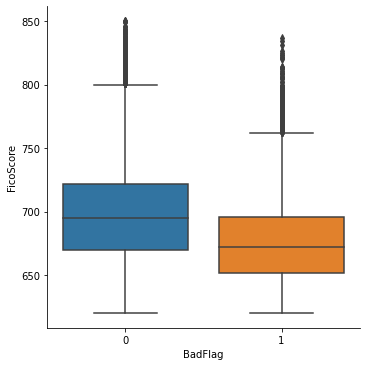

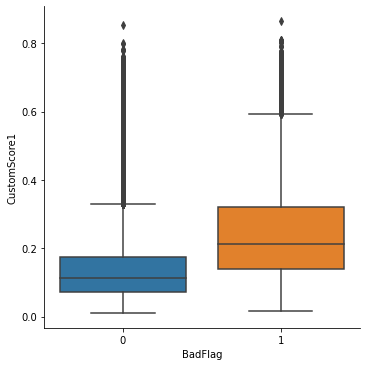

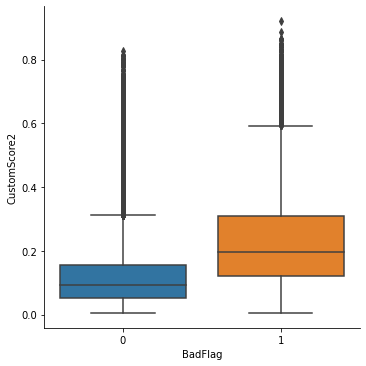

In [4]:
sns.catplot('BadFlag','FicoScore',data=df,kind='box')
sns.catplot('BadFlag','CustomScore1',data=df,kind='box')
sns.catplot('BadFlag','CustomScore2',data=df,kind='box')

<AxesSubplot:>

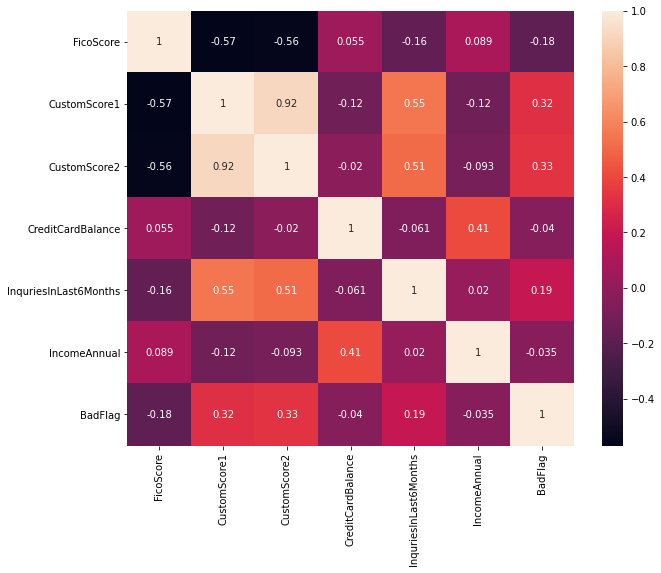

In [5]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

We can Clearly Understand from these charts above, states that FICO is Negatively Correlated to BadFlag(Means Account is good or bad), While CustomScore1 and CustomScore2 is Postively Correlated.

In Terms of Correlation CustomScore2 is Most Efficient for Analyzing Good or Bad Accounts.
__________________

2. Are CreditCardBalance and InquiriesInLast6Months predictive of risk in addition to the best score you identified from the last question?

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


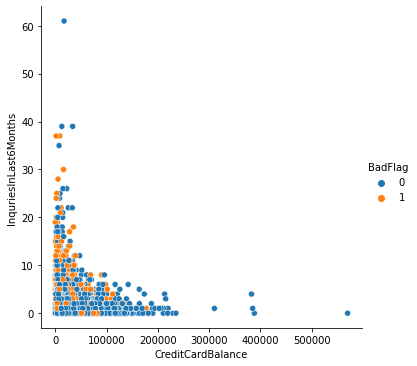

In [6]:
sns.relplot('CreditCardBalance','InquriesInLast6Months',data=df,hue='BadFlag')

<AxesSubplot:>

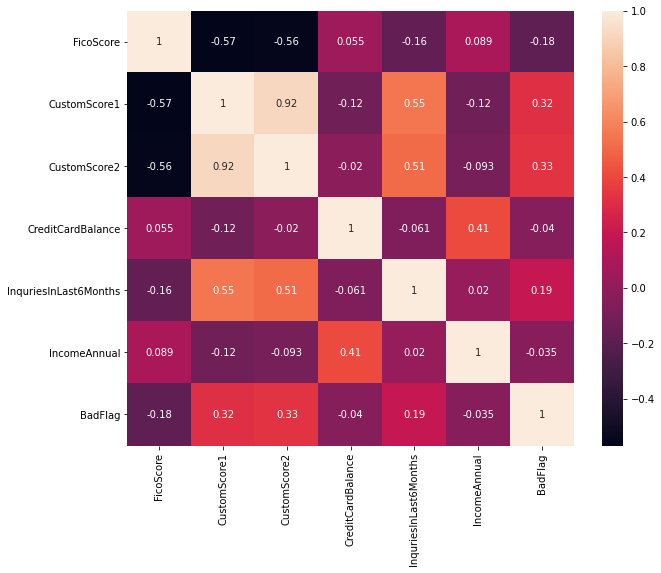

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

InquiriesInLast6Months is more Efficient to Predict Risk as compare to CreditCardBalance


### Section 3 - Operations

#### Tasks and questions:
(1) Please estimate the number of Charge-offs (120+ days late) that might have occurred
by month in 2020 and your Charge Off Projections for 2021 Q1.

(2) Please estimate the roll rates by each bucket; i.e. % of 30-59 roll over to 60-89, from
60-89 to 90-119.(3) Pl provide your best forecast from the available data for all the delinquencies (by
bucket) for Q1 of 2021.

(3) Pl provide your best forecast from the available data for all the delinquencies (by
bucket) for Q1 of 2021.

(4) Now provide your best estimate of the number of agents needed in the Collections
Department to meet the demand for Q1, 2021.

(5) If the department is staffed at only 66% of your required capacity you have
projected, please provide a calling strategy that will make best use of the limited
resources. Provide appropriate reasoning to justify your recommendation.

(6) Assuming an average account has 15,000 in balance when they charge-off and an
average agent’s annual income is 70,000 – lay out the economics for the level of
performance required by collections to justify the costs.

(7) What other strategies would you recommend to drive improvement in collections
effectiveness. Also, what other data elements about the customer do you think can help
you better optimize your collection strategy.


###### For the purposes of this case, we will make a few following assumptions.
- The probability of actually getting in touch with a delinquent customer who is less than 30 days past due is 10%, after that the probability drops to 3%
- It takes about 2 minutes to prepare to call each contact; but it takes 10 minutes to talk if they get hold of a customer.
- About 90% of customers who are delinquent for greater than 90 days Charge Off.
- An agent works 8 hours a day with 1.5 hours of break/meeting time. 10% of an agent’s time could be assumed to be in vacation.

-----------------------------------------

1. Please estimate the number of Charge-offs (120+ days late) that might have occurred by month in 2020 and your Charge Off Projections for 2021 Q1.

In [8]:
df2.drop(['Unnamed: 8','Unnamed: 9'],axis=1,inplace=True)
df2.head()

,Days past Due tier,1 to 14,15 to 29,30 to 59,60 to 89,90 to 119,TOTAL Delinquecies,Charge-Off (120+)
0,2020-01-13,825.0,405.0,525.0,375.0,292.5,2422.5,NaN
1,2020-01-14,1012.5,405.0,472.5,405.0,277.5,2572.5,NaN
2,2020-01-15,1035.0,360.0,435.0,412.5,285.0,2527.5,NaN
3,2020-01-16,1042.5,307.5,450.0,405.0,285.0,2490.0,NaN
4,2020-01-17,1117.5,315.0,435.0,420.0,285.0,2572.5,NaN


In [9]:
df2['Charge-Off (120+)']= df2['90 to 119'].apply(lambda x: x*0.90)

In [10]:
df2.head()

,Days past Due tier,1 to 14,15 to 29,30 to 59,60 to 89,90 to 119,TOTAL Delinquecies,Charge-Off (120+)
0,2020-01-13,825.0,405.0,525.0,375.0,292.5,2422.5,263.25
1,2020-01-14,1012.5,405.0,472.5,405.0,277.5,2572.5,249.75
2,2020-01-15,1035.0,360.0,435.0,412.5,285.0,2527.5,256.50
3,2020-01-16,1042.5,307.5,450.0,405.0,285.0,2490.0,256.50
4,2020-01-17,1117.5,315.0,435.0,420.0,285.0,2572.5,256.50


Monthly Report of Charge off's

In [11]:
df3 = df2.set_index('Days past Due tier')
monthsum = []
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    monthsum.append(df3.loc[f'2020-{i}']['Charge-Off (120+)'].sum())
month_name = ['January','Febuary','March','April','May','June','July','August','September','October','November','December']

In [12]:
Mondf = pd.DataFrame(month_name,columns=['Month'])
Mondf['Total Charge Off'] = monthsum
Mondf

,Month,Total Charge Off
0,January,3678.75
1,Febuary,6554.25
2,March,6453.00
3,April,5406.75
4,May,3807.00
5,June,5305.50
6,July,8862.75
7,August,8451.00
8,September,9153.00
9,October,9969.75


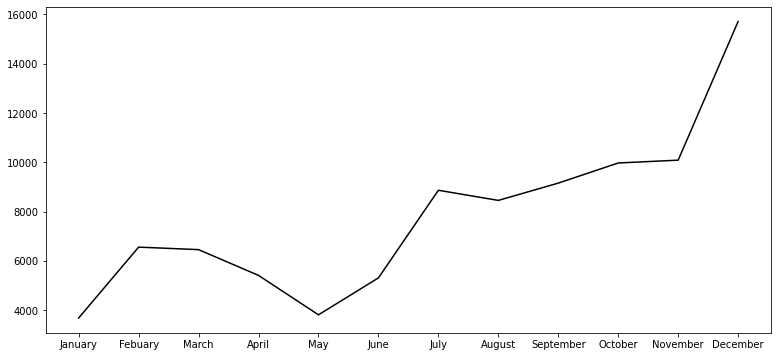

In [13]:
plt.figure(figsize=(13,6))
plt.plot(Mondf.Month,Mondf['Total Charge Off'],color='black')

Here we can see overall growing Trend of Charge off customers.

___________________________________________________________________

2. Please estimate the roll rates by each bucket; i.e. % of 30-59 roll over to 60-89, from 60-89 to 90-119.

In [14]:
cols = ['1 to 14', '15 to 29', '30 to 59', '60 to 89','90 to 119']
RollRates = []
for i in range(len(cols)):
    if i<=3:
        RollRates.append(float(str((df2[cols[i]].sum()-df2[cols[i+1]].sum())/df2[cols[i]].sum()*100)[:5]))

In [15]:
roll = pd.DataFrame(cols[1:],columns=['Days tier'])
roll['Roll Rates (%)'] = RollRates

In [16]:
roll

,Days tier,Roll Rates (%)
0,15 to 29,63.71
1,30 to 59,3.13
2,60 to 89,21.20
3,90 to 119,18.20


c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Days tier', ylabel='Roll Rates (%)'>

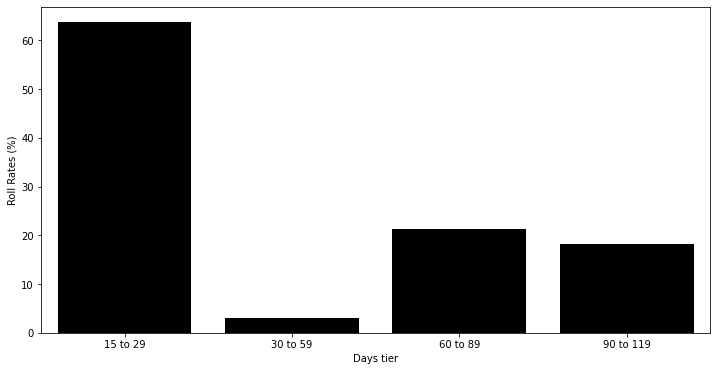

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(roll['Days tier'],roll['Roll Rates (%)'],color='black')

In [18]:
tr = df2.copy()

In [19]:
tr['Year'] = tr['Days past Due tier'].dt.year
tr['Month'] = tr['Days past Due tier'].dt.month
tr['Day'] = tr['Days past Due tier'].dt.day

Building Linear Regression Model

In [20]:
x = tr[['Year','Month','Day']]
y1 = tr['1 to 14']
y2 = tr['15 to 29']
y3 = tr['30 to 59']
y4 = tr['60 to 89']
y5 = tr['90 to 119']

In [21]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x,y1,test_size=0.10,random_state=10)
x2_train,x2_test,y2_train,y2_test = train_test_split(x,y2,test_size=0.10,random_state=10)
x3_train,x3_test,y3_train,y3_test = train_test_split(x,y3,test_size=0.10,random_state=10)
x4_train,x4_test,y4_train,y4_test = train_test_split(x,y4,test_size=0.10,random_state=10)
x5_train,x5_test,y5_train,y5_test = train_test_split(x,y5,test_size=0.10,random_state=10)

In [22]:
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()

In [23]:
model1.fit(x1_train,y1_train)
model2.fit(x2_train,y2_train)
model3.fit(x3_train,y3_train)
model4.fit(x4_train,y4_train)
model5.fit(x5_train,y5_train)

LinearRegression()

In [24]:
score1 = model1.score(x1_test,y1_test)
score2 = model2.score(x2_test,y2_test)
score3 = model3.score(x3_test,y3_test)
score4 = model4.score(x4_test,y4_test)
score5 = model5.score(x5_test,y5_test)
AverageScore = str(((score1+score2+score3+score4+score5)/5)*100)[:5]+"%"
AverageScore

'74.20%'

In [25]:
cs = pd.date_range(start='1/1/2021', end='31/03/2021')
fd = []
Forcast = pd.DataFrame(cs,columns=['Date'])
def Chn(val):
    x = str(val)[:10].split('-')
    y = []
    for i in x:
        i = int(i)
        y.append(i)
    return y 
for i in cs:
    fd.append(Chn(i))
p1 = model1.predict(pd.DataFrame(fd))
p2 = model2.predict(pd.DataFrame(fd))
p3 = model3.predict(pd.DataFrame(fd))
p4 = model4.predict(pd.DataFrame(fd))
p5 = model5.predict(pd.DataFrame(fd))

In [26]:
Forcast['1 to 14 (Predicted)'] = p1
Forcast['15 to 29 (Predicted)'] = p2
Forcast['30 to 59 (Predicted)'] = p3
Forcast['60 to 89 (Predicted)'] = p4
Forcast['90 to 119 (Predicted)'] = p5
ce = Forcast.columns[1:]
total = []
for i in range(len(Forcast['1 to 14 (Predicted)'])):
     total.append(Forcast[ce[0]][i]+Forcast[ce[1]][i]+Forcast[ce[2]][i]+Forcast[ce[3]][i]+Forcast[ce[4]][i])
Forcast['Total'] = total

In [27]:
Forcast

,Date,1 to 14 (Predicted),15 to 29 (Predicted),30 to 59 (Predicted),60 to 89 (Predicted),90 to 119 (Predicted),Total
0,2021-01-01,577.711057,82.710398,169.636964,219.971789,177.676782,1227.706990
1,2021-01-02,579.362279,90.733106,172.849219,220.627451,179.009722,1242.581777
2,2021-01-03,581.013500,98.755814,176.061473,221.283113,180.342663,1257.456564
3,2021-01-04,582.664722,106.778523,179.273728,221.938775,181.675603,1272.331351
4,2021-01-05,584.315944,114.801231,182.485982,222.594437,183.008543,1287.206138
...,...,...,...,...,...,...,...
85,2021-03-27,1068.709762,460.370064,409.600093,339.785998,292.124309,2570.590226
86,2021-03-28,1070.360984,468.392772,412.812347,340.441660,293.457249,2585.465013
87,2021-03-29,1072.012206,476.415480,416.024602,341.097322,294.790189,2600.339800
88,2021-03-30,1073.663428,484.438189,419.236856,341.752984,296.123130,2615.214587


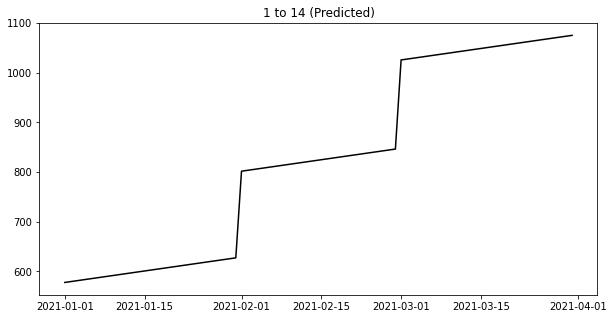

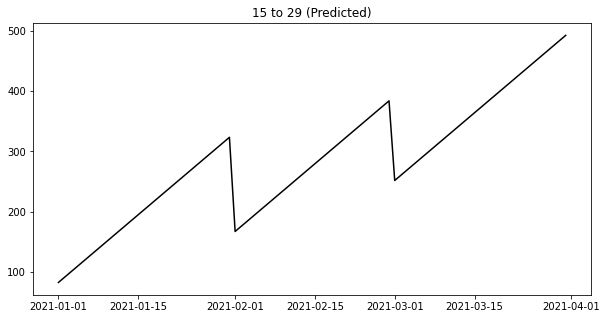

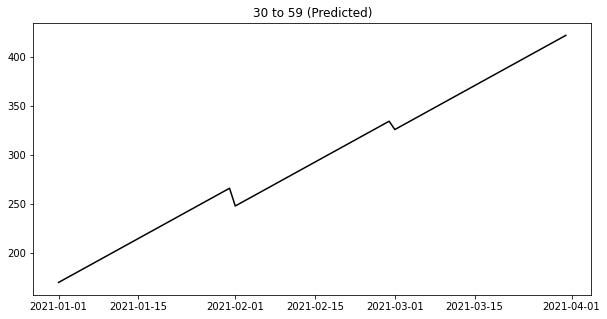

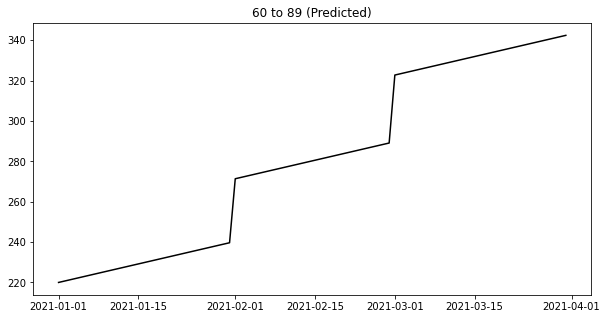

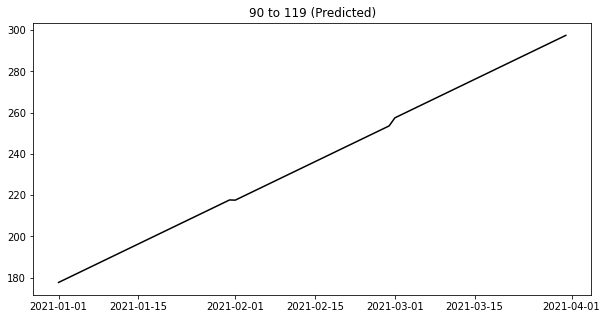

In [28]:
for i in Forcast.columns[1:-1]:
    plt.figure(figsize=(10,5))
    plt.plot(Forcast.set_index('Date')[i],color='black')
    plt.title(i)

4. Now provide your best estimate of the number of agents needed in the Collections Department to meet the demand for Q1, 2021.

###### Assumption
As We Know an Agent work 8 Hours in a day with 1.5 hours break. so, he actively work about 6.5 hours

In [29]:
6.5*60 #How Much Minutes an Agent works

390.0

In [30]:
390/15 #How Much calls it makes

26.0

Agents Required to Call every twice a day, and if I estimate how much number of Agents make calls on a single day, so it is approximately 25 to 27 calls a day

In [31]:
print('Here we can see Average number of delinquencies in between 1 to 14 day of Q1 of 2021 is:')
Forcast['1 to 14 (Predicted)'].mean()

Here we can see Average number of delinquencies in between 1 to 14 day of Q1 of 2021 is:


825.7422831102375

In [32]:
print('These are the numbers of customers needed to Called Every day')
Forcast['15 to 29 (Predicted)'].mean()+Forcast['30 to 59 (Predicted)'].mean()


These are the numbers of customers needed to Called Every day


578.385702240966

In [33]:
print('These are the numbers of customers needed to meet on Alternative days, or Twice a day')
Forcast['60 to 89 (Predicted)'].mean()+Forcast['90 to 119 (Predicted)'].mean()

These are the numbers of customers needed to meet on Alternative days, or Twice a day


517.8286295730678

In [34]:
825/26  + 578/26 + 517/10


105.66153846153847

Approximately we need 100 to 105 Agents needed in the collection Departement to meet the demand for Q1 of 2021

5. If the department is staffed at only 66% of your required capacity you have projected, please provide a calling strategy that will make best use of the limited resources. Provide appropriate reasoning to justify your recommendation.

In my Suggestion from 0 to 15 days, if we use Automated System to Call the
customer and use recorded voices, and in 15 to 30 days, Agents will call daily basis,
and after 30 days agent need to meet with customers, As we can see in the chart
shown below that, the customer in 0 to 14 bucket have Most Delinquencies, but in 15
to 29 bucket, it came down, after that, all bucket have kind of constant delinquencies,
so in 0 to 15, if we use Automated calling System, so it will help us to grab customer,
and in 15 to 30 days, Agent Call Customer Manually, and then after 30 days have a
meeting with a customer, it is the better strategy to grab customer, and get rid of
charge off

6. Assuming an average account has 15,000 in balance when they charge-off and an average agent’s annual income is 70,000 – lay out the economics for the level of performance required by collections to justify the costs.

if the annual income of Agent is 70000 means monthly income will be 5900, and the consumer who charge off, have average amount due is 15000 dollars, the performance required for a single Agent is to he should get at least (Minimum) 5 customers to pay-off their money back in a single month and 60 in a year, and it can justify the cost of the average salary of an agent. 

7. What other strategies would you recommend to drive improvement in collections effectiveness. Also, what other data elements about the customer do you think can help you better optimize your collection strategy.


## Recomendation
I have some recommendations are as follows:
- we should develop an automated calling system call on an Hourly or Half-day  basis, so we can remind our customers more consistently
- In the Data, people with less than an Annual Income of 70,000 are more likely  to be charge-off, so while dealing with those customers, we should have some  limit, so they do not charge off.
- If we created some obligatory factors, for charge-off customers It will also help nus to retain customers